In [281]:
import pandas as pd
import statsmodels.formula.api as sm
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt

In [282]:
df = pd.read_csv('reg_df.csv', index_col=0, parse_dates=True)

In [283]:
df['Spread_10Y3M'] = df['r10Y'] - df['r3M']
df['Spread_10Y2Y'] = df['r10Y'] - df['r2Y']
df['Spread_30Y3M'] = df['r30Y'] - df['r3M']
df['Spread_10YFFR'] = df['r10Y'] - df['FFR']
df['Spread_5YFFR'] = df['r5Y'] - df['FFR']
df['Spread_3MFFR'] = df['r3M'] - df['FFR']

In [284]:
# df_train = df['1981-09-30':'1984-09-30']
# df_test = df['1984-09-30':]
df = df['1984-09-30':]

# Single Variable

In [29]:
results = []
for i in range(1, 9):
    names = []
    prsquareds = []
    tvalues = []
    df_temp = df.copy()
    df_temp['y'] = df_temp.USRECQ.shift(-i)
    for var in df_temp.columns:
        if var in ['y']:
            continue
        formula = 'y ~ ' + var
        names.append(formula)
        logitfit = sm.probit(formula = formula, data = df_temp).fit(disp=0)
        tvalues.append(logitfit.tvalues[var])
        prsquareds.append(logitfit.prsquared)
    df_temp = pd.DataFrame((names, prsquareds, tvalues)).T
    df_temp.columns = ['model', 'prsquared_'+str(i) , 'tstat_'+str(i)]
    df_temp.set_index('model', inplace=True)
    results.append(df_temp)
summary = pd.concat(results, axis=1)

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


In [30]:
summary

,prsquared_1,tstat_1,prsquared_2,tstat_2,prsquared_3,tstat_3,prsquared_4,tstat_4,prsquared_5,tstat_5,prsquared_6,tstat_6,prsquared_7,tstat_7,prsquared_8,tstat_8
model,,,,,,,,,,,,,,,,
y ~ M1SL,0.00700491,0.807514,0.0065911,0.78243,0.00683677,0.796127,0.0073924,0.8271,0.00832815,0.877043,0.00955213,0.938338,0.0109915,1.0054,0.012564,1.0734
y ~ M2SL,0.0227824,1.44755,0.0211505,1.39385,0.0198643,1.34981,0.0187084,1.30888,0.0179147,1.27949,0.0173687,1.25841,0.0170251,1.24437,0.0167053,1.23107
y ~ TB3MS,2.91042e-05,0.0516573,0.00956933,0.933277,0.0240946,1.4677,0.0368508,1.79757,0.0478192,2.02788,0.0488862,2.04521,0.0367837,1.78729,0.0211501,1.3679
y ~ TB6MS,1.28353e-06,-0.0108438,0.00764253,0.834611,0.0208049,1.36597,0.0334141,1.71475,0.045974,1.98962,0.0476789,2.01983,0.0365192,1.77965,0.0217985,1.38724
y ~ GDPC1,0.0449095,1.9602,0.0481213,2.02214,0.0486904,2.03103,0.0475999,2.0077,0.046798,1.98965,0.044406,1.93955,0.0424525,1.89726,0.0393144,1.82827
y ~ USRECQ,0.456937,5.90033,0.16075,3.84309,0.0325357,1.77579,0.008207,0.887371,0.000143649,-0.113446,0.0271342,-0.00148834,0.0274178,-0.000568464,0.027707,-9.18215e-05
y ~ r3M,0.00125781,-0.338666,0.00486764,0.667102,0.0182667,1.28292,0.0294174,1.61568,0.043594,1.94432,0.0494868,2.05866,0.0427071,1.91894,0.0257729,1.50642
y ~ r1Y,0.00385972,-0.591149,0.00118413,0.329386,0.00830717,0.869856,0.0172893,1.24808,0.0319448,1.67867,0.0399825,1.8639,0.0368468,1.79,0.0218121,1.38932
y ~ r2Y,0.00875388,-0.885132,0.00013502,-0.111028,0.00140965,0.359089,0.00567306,0.719055,0.0155275,1.18269,0.0228566,1.42618,0.0225066,1.41309,0.0117639,1.02668


# Comparing Spreads

In [37]:
spreads_list = ['Spread_10Y3M', 'Spread_10Y2Y', 'Spread_30Y3M', 'Spread_10YFFR', 'Spread_5YFFR', 'Spread_3MFFR']

In [38]:
# results = []
# for i in range(1, 9):
#     names = []
#     prsquareds = []
#     tvalues = []
#     df_temp = df.copy()
#     df_temp['y'] = df_temp.USRECQ.shift(-i)
#     for var in spreads_list:
#         if var in ['y']:
#             continue
#         formula = 'y ~ ' + var
#         names.append(formula)
#         logitfit = sm.logit(formula = formula, data = df_temp).fit(disp=0)
#         tvalues.append(logitfit.tvalues[var])
#         prsquareds.append(logitfit.prsquared)
#     df_temp = pd.DataFrame((names, prsquareds, tvalues)， index=['model']).T
#     df_temp.columns = ['model', 'prsquared_'+str(i) , 'tstat_'+str(i)]
#     df_temp.set_index('model', inplace=True)
#     results.append(df_temp)
# summary = pd.concat(results, axis=1)

In [241]:
# summary

In [146]:
np.set_printoptions(3)
results = []
for var in spreads_list:
    tvalues = []
    params = []
    prsquareds = []
    names = []

    for i in range(1, 6):
        df_temp = df.copy()
        df_temp['y'] = df_temp.USRECQ.shift(-i)
        probitfit = sm.probit(formula = 'y ~ USRECQ + ' + var, 
                              data = df_temp).fit(disp=0)
        names.append(var)
        tvalues.append(probitfit.tvalues[var])
        pval = probitfit.pvalues[var]
        stars = 0
        if pval < 0.001:
            stars = 3
        elif pval < 0.01:
            stars = 2
        elif pval < 0.05:
            stars = 1
        params.append(str(probitfit.params[var].round(3)) + '*' * stars)
        #params.append(probitfit.params[var])
        prsquareds.append('(' + str(probitfit.prsquared.round(3)) + ')')
    df_temp = pd.DataFrame((params, prsquareds), index=[var, ''], 
                           columns=['k=3', 'k=6', 'k=9', 'k=12', 'k=15'])
    results.append(df_temp)
result_df = pd.concat(results)

In [147]:
result_df

,k=3,k=6,k=9,k=12,k=15
Spread_10Y3M,-0.852*,-1.026***,-1.196***,-1.267***,-1.275***
,(0.583),(0.413),(0.388),(0.399),(0.398)
Spread_10Y2Y,-0.978*,-1.198**,-1.364**,-1.561***,-2.237***
,(0.539),(0.331),(0.267),(0.292),(0.374)
Spread_30Y3M,-0.527*,-0.608***,-0.726***,-0.726***,-0.735***
,(0.575),(0.399),(0.376),(0.365),(0.363)
Spread_10YFFR,-0.775**,-0.88***,-0.958***,-1.095***,-0.949***
,(0.605),(0.428),(0.394),(0.427),(0.372)
Spread_5YFFR,-0.959**,-1.026***,-1.111***,-1.213***,-1.013***
,(0.614),(0.427),(0.393),(0.41),(0.324)


# Probability Graph Generator

In [297]:
def get_prediction_graph(data, horizon, formula):
    df_temp = data.copy()
    df_temp['y'] = df_temp.USRECQ.shift(-horizon)
    probitfit = sm.probit(formula = formula, data = df_temp).fit(maxiter=100, disp=0)
    #fitted = probitfit.model.cdf(probitfit.fittedvalues)
    fitted = probitfit.predict(df_temp)
    plt.figure(figsize=[15,8])
    sns.lineplot(y=fitted.shift(horizon), x=fitted.index)
    plt.ylabel('Recession Probability')
    plt.title('Probit Model: '+ formula + '\n '+ str(horizon*3) + '-month Forecast Horizon ')
    plt.xlabel('Year')
    plt.axvspan(df.index[24], df.index[26], color=sns.xkcd_rgb['grey'], alpha=0.5)
    plt.axvspan(df.index[66], df.index[69], color=sns.xkcd_rgb['grey'], alpha=0.5)
    plt.axvspan(df.index[93], df.index[99], color=sns.xkcd_rgb['grey'], alpha=0.5)
    plt.axvspan(df.index[141], df.index[144], color=sns.xkcd_rgb['grey'], alpha=0.5)
    plt.show()

In [299]:
def get_prediction_graph_multiple(data, horizon, formulas, dummy=False):
    df_temp = data.copy()
    df_temp['y'] = df_temp.USRECQ.shift(-horizon)
    plt.figure(figsize=[15,8])
    for formula in formulas:
        probitfit = sm.probit(formula = formula, data = df_temp).fit(maxiter=100, disp=0)
        #fitted = probitfit.model.cdf(probitfit.fittedvalues)
        fitted = probitfit.predict(df_temp)
        sns.lineplot(y=fitted.shift(horizon), x=fitted.index, label=formula)
    plt.ylabel('Recession Probability')
    plt.title('Probit Models'+ (' Using a Lagged Dependent Variable' if dummy else '') +': ' + str(horizon*3) + '-month Forecast Horizon ')
    plt.xlabel('Year')
    plt.legend()
    plt.axvspan(df.index[24], df.index[26], color=sns.xkcd_rgb['grey'], alpha=0.5)
    plt.axvspan(df.index[66], df.index[69], color=sns.xkcd_rgb['grey'], alpha=0.5)
    plt.axvspan(df.index[93], df.index[99], color=sns.xkcd_rgb['grey'], alpha=0.5)
    plt.axvspan(df.index[141], df.index[144], color=sns.xkcd_rgb['grey'], alpha=0.5)
    plt.show()

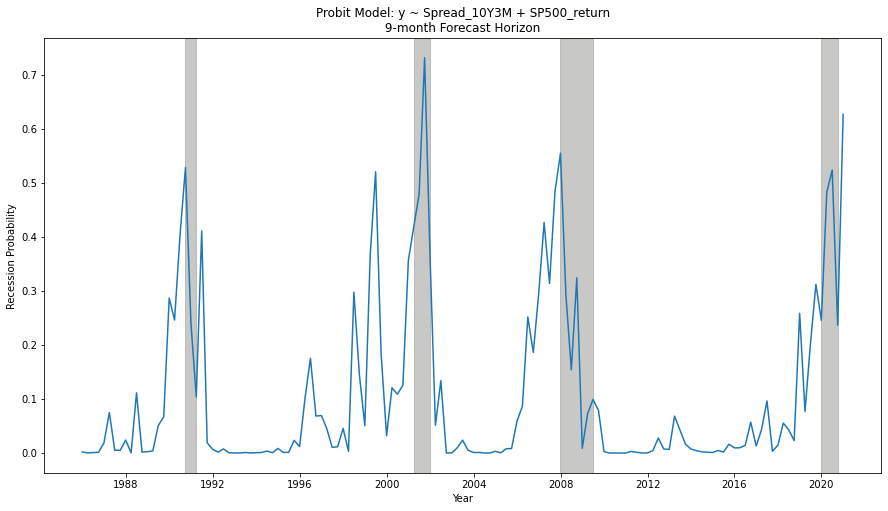

In [300]:
get_prediction_graph(df, horizon=3, formula='y ~ Spread_10Y3M + SP500_return')

In [288]:
df.columns

Index(['M1SL', 'M2SL', 'TB3MS', 'TB6MS', 'GDPC1', 'USRECQ', 'r3M', 'r1Y',
       'r2Y', 'r3Y', 'r5Y', 'r7Y', 'r10Y', 'r20Y', 'r30Y', 'FFR',
       'NYSE_return', 'SP500_return', 'DJIA_return', 'Spread_10Y3M',
       'Spread_10Y2Y', 'Spread_30Y3M', 'Spread_10YFFR', 'Spread_5YFFR',
       'Spread_3MFFR'],
      dtype='object')

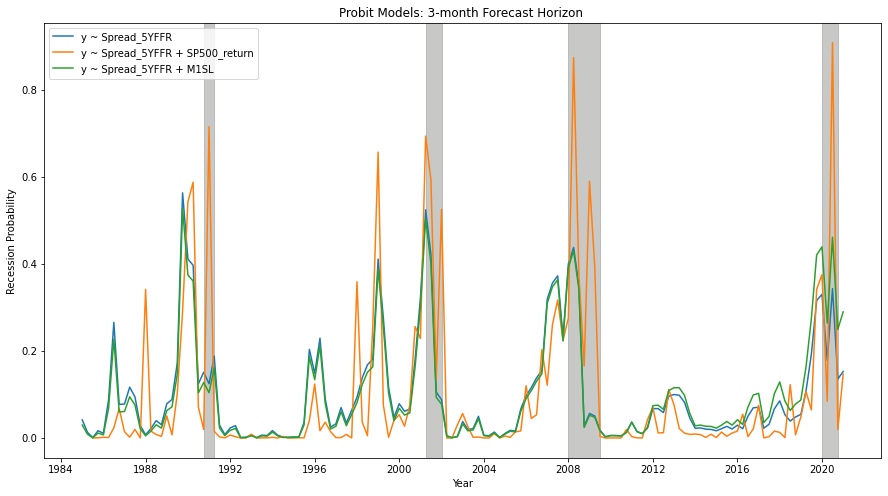

In [302]:
get_prediction_graph_multiple(df, horizon=1, formulas=['y ~ Spread_5YFFR', 'y ~ Spread_5YFFR + SP500_return',
                                                       'y ~ Spread_5YFFR + M1SL'])

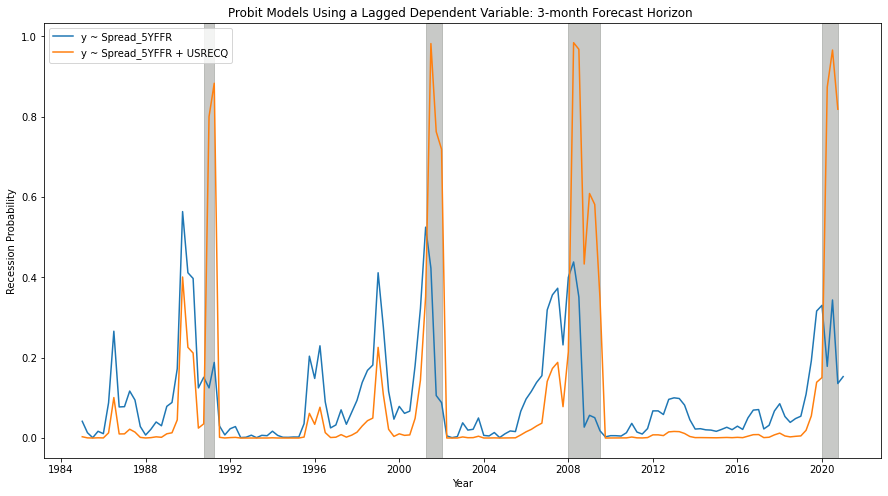

In [303]:
get_prediction_graph_multiple(df, horizon=1, dummy=True, formulas=['y ~ Spread_5YFFR', 'y ~ Spread_5YFFR + USRECQ'])

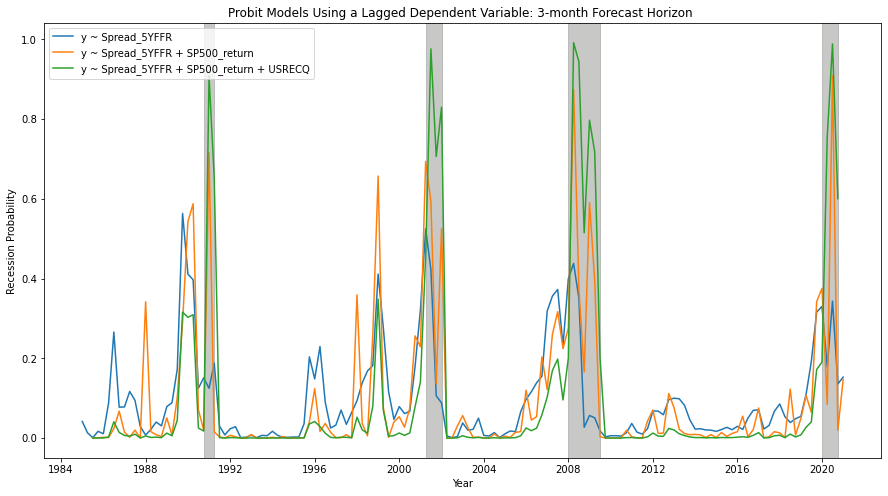

In [306]:
get_prediction_graph_multiple(df, horizon=1, dummy=True, formulas=['y ~ Spread_5YFFR', 'y ~ Spread_5YFFR + SP500_return',
                                                                  'y ~ Spread_5YFFR + SP500_return + USRECQ'])

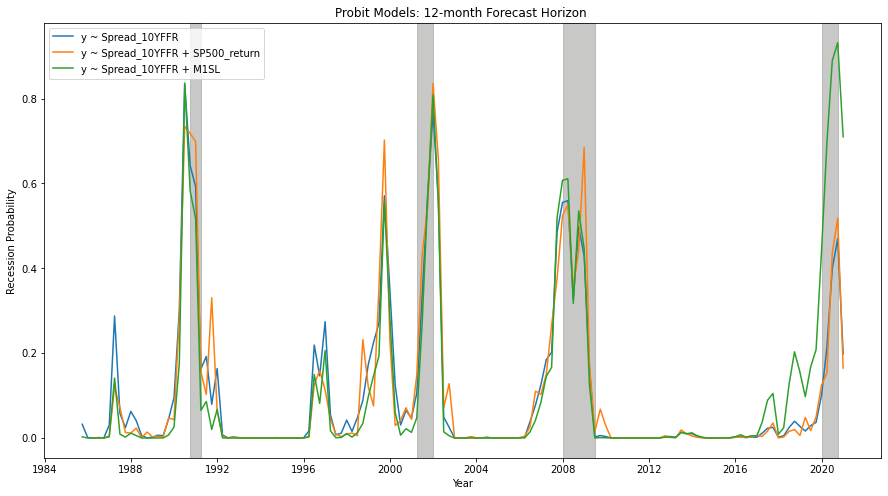

In [310]:
get_prediction_graph_multiple(df, horizon=4, formulas=['y ~ Spread_10YFFR', 'y ~ Spread_10YFFR + SP500_return',
                                                       'y ~ Spread_10YFFR + M1SL'])

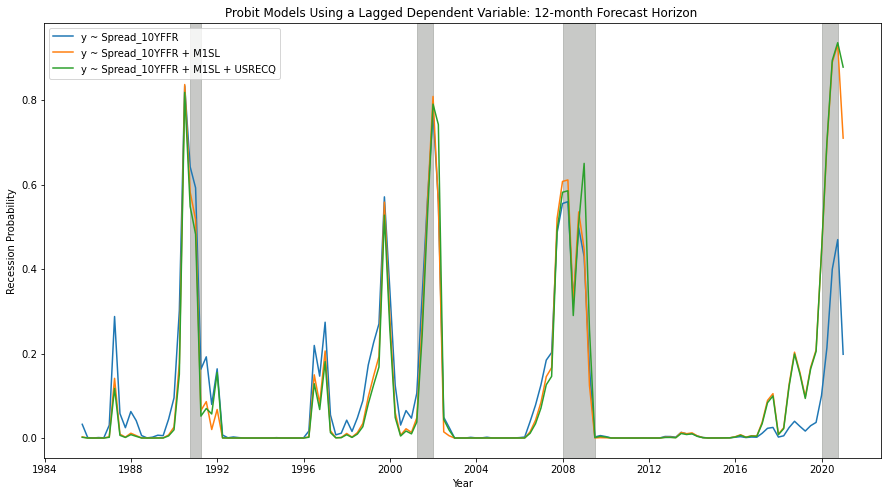

In [312]:
get_prediction_graph_multiple(df, horizon=4, dummy=True, formulas=['y ~ Spread_10YFFR', 'y ~ Spread_10YFFR + M1SL',
                                                                  'y ~ Spread_10YFFR + M1SL + USRECQ'])